In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
icecream = pd.read_csv('E:\\JESIN\\DOCUMENTS\\scma\\A4\\icecream.csv')

In [9]:
# Display the dataset to confirm it's loaded correctly
print(icecream.head())

     Brand  Price  Availability  Taste  Flavour  Consistency  Shelflife
0     Amul      4             5      4        3            4          3
1  Nandini      3             2      3        2            3          3
2  Vadilal      2             2      4        3            4          4
3   Vijaya      3             1      3        5            3          4
4    Dodla      3             3      3        4            4          3


In [10]:
# Extract the attributes for MDS (excluding the Brand column)
icecream_mds = icecream.iloc[:, 1:]  # Assuming 'Brand' is the first column

# Calculate the distance matrix
dist_matrix = squareform(pdist(icecream_mds))

# Perform Multidimensional Scaling (MDS)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(dist_matrix)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


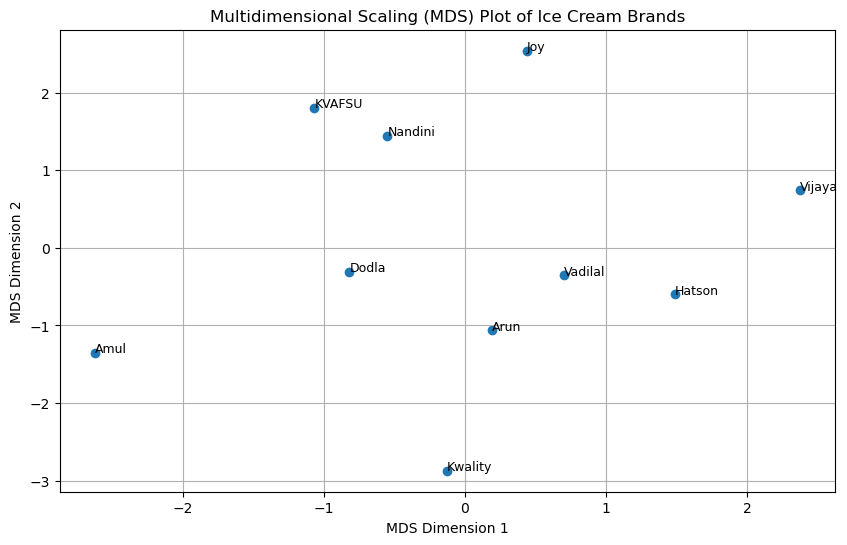

In [11]:
# Create a DataFrame for the MDS results
plot_data = pd.DataFrame({
    'x': mds_results[:, 0],  # X-axis coordinates
    'y': mds_results[:, 1],  # Y-axis coordinates
    'brand': icecream['Brand']  # Brand names
})

# Plot the MDS results
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['x'], plot_data['y'])

for i in range(plot_data.shape[0]):
    plt.text(plot_data['x'][i], plot_data['y'][i], plot_data['brand'][i], fontsize=9)

plt.title('Multidimensional Scaling (MDS) Plot of Ice Cream Brands')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()
